<a href="https://colab.research.google.com/github/rafael-ferraz/MVP_Sprint3/blob/main/mvp_insuficiencia_cardiaca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MVP - Predição de Pacientes com Insuficiência Cardíaca
Sprint: Machine Learning & Analytics<br>
Aluno: Rafael Ferraz de Queiroz<br>

# Sobre o Problema

O problema proposto neste MVP é a predição de doença cardíaca em pacientes a partir da análise de atributos clínicos de uma amostra de casos, com a patologia confirmada ou não.

Segundo dados de 2020 da OMS, as doenças cardiovasculares foram responsáveis pela morte de 1/3 das mulheres no mundo. Partindo dessa premissa, eu estimo que o modelo sugerido neste MVP consiga também demonstrar essas características.

No decorrer deste projeto, serão demonstradas as etapas que vão desde a preparação dos dados até o treinamento dos modelos, para que ao final possa ser feita uma análise para determinar qual apresenta melhor acurácia para o contexto deste problema.

## Restrições e Condições

De acordo com o autor do repositório do dataset utilizado neste MVP, ele é o conjunto de outros datasets do coração disponíveis individualmente mas nunca combinados antes. Inicialmente haviam 1190 observações, mas realizadas tratativas para remoção de duplicatas, resultaram em 918 observações.

# Sobre o Dataset

O *Heart Failure Dataset* foi obtido da plataforma *Kaggle* e possui atributos que são características clínicas de pacientes que tiveram ou não doença cardíaca. Ele é do tipo supervisionado, com uma classe preditora e 11 atributos previsores.

Trata-se de um dataset bem avaliado pelos profissionais de aprendizado de máquina da plataforma nos quesitos de completude, credibilidade e compatibilidade.

Link do dataset: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

## Descrição dos Atributos

| Nome | Descrição |
|:-----|:----------|
|Age|Idade do Paciente|
|Sex|Sexo do paciente|
|ChestPainType|Tipo de dor no peito|
|RestingBP|Pressão sanguínea em repouso|
|Cholesterol|Medida de colesterol|
|FastingBS|Pressão sanguínea em jejum|
|RestingECG|Resultado de eletrocardiograma em repouso|
|MaxHR|Taxa máxima de batimento cardíaco|
|ExerciseAngina|Dor no coração ao exercitar|
|oldpeak|Depressão ST induzida pelo exercício|
|ST_Slope|O declive do pico de depressão ST induzida pelo exercício|
|HeartDisease|Classe preditora|


# Importação das Ferramentas
Nesta etapa importaremos as configurações e ferramentas necessárias para as ações no decorrer desse projeto.

In [154]:
# Oculta as mensagens do tipo alerta
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # Ferramenta para plotar gráficos
from sklearn.feature_selection import SelectKBest # Método para a Seleção Univariada
from sklearn.feature_selection import f_classif # Para o teste ANOVA da seleção univariada
from sklearn.model_selection import train_test_split # Para dividir as amostras em treino e teste
from sklearn.model_selection import KFold # Para realizar a validação cruzada
from sklearn.model_selection import cross_val_score # Pontuação por Validação Cruzada
from sklearn.model_selection import GridSearchCV # Recurso de Grid Search
from sklearn.metrics import accuracy_score # Para a exibição da acurácia do modelo
from sklearn.preprocessing import MinMaxScaler # Para tratamento de normalização
from sklearn.preprocessing import LabelEncoder # Para tratamento de dados categórico
from sklearn.linear_model import LogisticRegression # Para a técnica de Regressão Logistica
from sklearn.tree import DecisionTreeClassifier # Para a técnica de Árvore de Classificação
from sklearn.neighbors import KNeighborsClassifier # Para a técnica de KNN
from sklearn.naive_bayes import GaussianNB # Para a técnica de Naive Bayes
from sklearn.svm import SVC # Para a técnica de SVM
from sklearn.ensemble import VotingClassifier # Para a técnica de Voting

# Importação e análise do Dataset
Aqui iremos realizar a importação do dataset através do arquivo CSV, analisando as informações para conhecer melhor como os dados estão preenchidos e elucidar quanto à necessidade de limpeza e preparação dos dados para o treinamento.

In [155]:
# armazena o dataset para utilização no notebook
dataset_original = pd.read_csv('https://raw.githubusercontent.com/rafael-ferraz/MVP_Sprint3/main/heart.csv', sep=',')

# lista o cabeçalho e as primeiras linhas do dataset
dataset_original.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Analisando a saída acima, é possível notar que o dataset é composto por dados numéricos (discretos e contínuos) e categóricos, além de uma classe preditora do tipo numérica.

In [156]:
# Informações sobre o dataset
dataset_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Aqui podemos notar que o dataset possui 918 registros, 12 colunas, nenhum valor nulo e alguns campos do tipo "object" que necessitam ser analisados.

In [157]:
# Verificar o quantitativo do preditor
dataset_original.groupby('HeartDisease').size()

HeartDisease
0    410
1    508
dtype: int64

Acima podemos notar que o preditor(HeartDisease) encontra-se balanceado entre pacientes com ou sem doenças cardíacas(respectivamente 1 e 0).

In [158]:
# Verificar os atributos categóricos
print('Sex: ',dataset_original['Sex'].unique())
print('ChestPainType: ',dataset_original['ChestPainType'].unique())
print('RestingECG: ',dataset_original['RestingECG'].unique())
print('ExerciseAngina: ',dataset_original['ExerciseAngina'].unique())
print('ST_Slope: ',dataset_original['ST_Slope'].unique())


Sex:  ['M' 'F']
ChestPainType:  ['ATA' 'NAP' 'ASY' 'TA']
RestingECG:  ['Normal' 'ST' 'LVH']
ExerciseAngina:  ['N' 'Y']
ST_Slope:  ['Up' 'Flat' 'Down']


Acima podemos perceber os valores distintos dos atributos categóricos. Para estes atributos será necessário realizar a conversão para que tornem-se atributos numéricos.

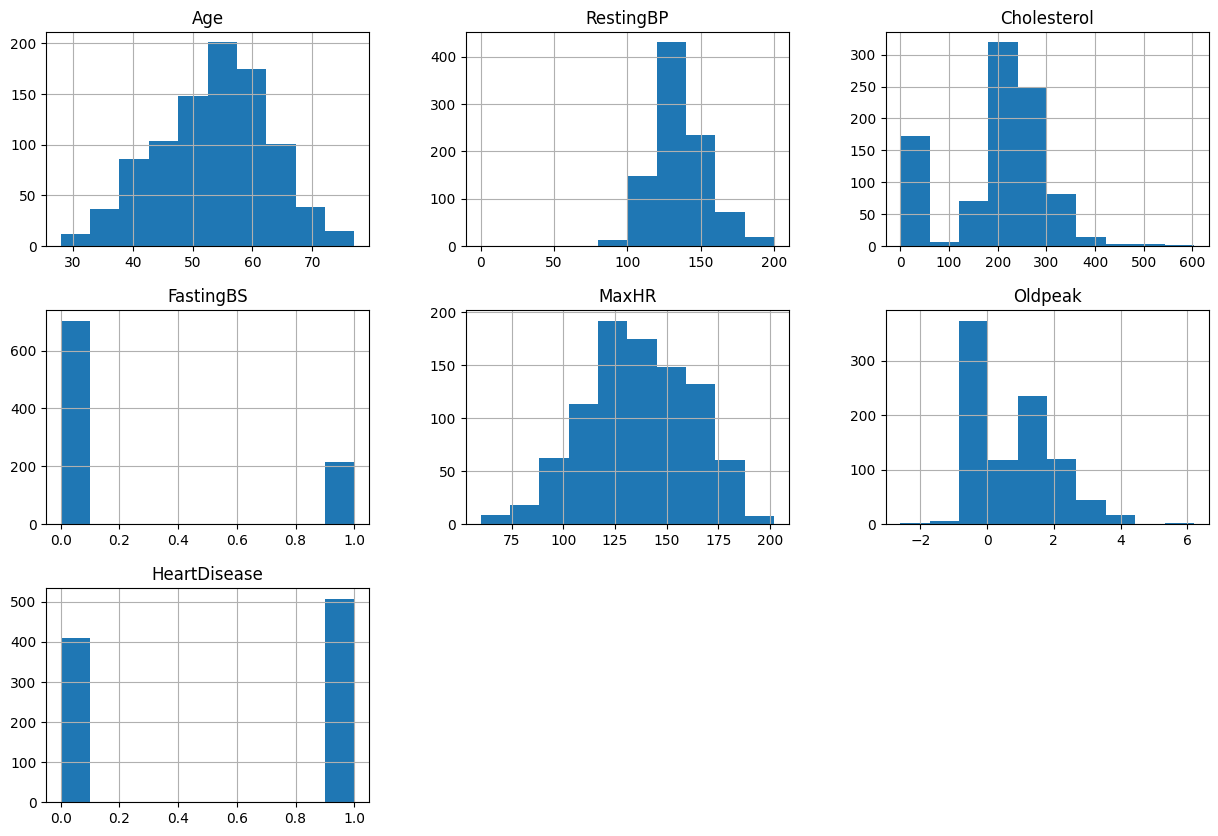

In [159]:
# Plotagem de histogramas dos atributos numéricos
dataset_original.hist(figsize = (15,10))
plt.show()

Acima podemos ver os histogramas dos atributos numéricos do dataset, apresentando um padrão de distribuição normal em alguns atributos (como <i>Age</i> e <i>MaxHR</i>). Estes dados serão normalizados na etapa de transformação.

# Pré-processamento dos Dados

Aqui iremos fazer as tratativas no dataset que foram identificadas na etapa de análise, para que o mesmo esteja adequado para o treinamento. A partir desta etapa utilizaremos versões diferentes do dataset para possíveis comparações posteriores.

## Tratamento de Dados Numéricos
Nesta etapa faremos a normalização dos atributos numéricos com o método <i>MinMaxScaler</i> da biblioteca scikit-learn.

In [160]:
# Versionamento do Dataset
dataset_normalized = dataset_original.copy()

# Definição do transformador
scaler = MinMaxScaler()

# Normaliza os atributos numéricos
age = scaler.fit_transform(dataset_normalized[['Age']])
restingbp = scaler.fit_transform(dataset_normalized[['RestingBP']])
cholesterol = scaler.fit_transform(dataset_normalized[['Cholesterol']])
fastingbs = scaler.fit_transform(dataset_normalized[['FastingBS']])
maxhr = scaler.fit_transform(dataset_normalized[['MaxHR']])
oldpeak = scaler.fit_transform(dataset_normalized[['Oldpeak']])

# Atribui os parâmetros normalizados ao dataset
dataset_normalized['Age'] = age
dataset_normalized['RestingBP'] = restingbp
dataset_normalized['Cholesterol'] = cholesterol
dataset_normalized['FastingBS'] = fastingbs
dataset_normalized['MaxHR'] = maxhr
dataset_normalized['Oldpeak'] = oldpeak

# Exibe o dataset na tela
dataset_normalized.head()



,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,0.244898,M,ATA,0.70,0.479270,0.0,Normal,0.788732,N,0.295455,Up,0
1,0.428571,F,NAP,0.80,0.298507,0.0,Normal,0.676056,N,0.409091,Flat,1
2,0.183673,M,ATA,0.65,0.469320,0.0,ST,0.267606,N,0.295455,Up,0
3,0.408163,F,ASY,0.69,0.354892,0.0,Normal,0.338028,Y,0.465909,Flat,1
4,0.530612,M,NAP,0.75,0.323383,0.0,Normal,0.436620,N,0.295455,Up,0


## Tratamento de Dados Categóricos

Para que os algorítimos de treinamento consiga interpretar corretamente o dataset, precisamos converter os dados categóricos para dados numéricos. Inicialmente iremos transformar os atributos do tipo <i>object</i> para <i>string</i>





In [161]:
# Versiona o dataset
dataset_categorized = dataset_normalized.copy()

# Obtem as colunas do tipo "object" e armazena
colunas_string = dataset_categorized.select_dtypes(include="object").columns

# Substitui as colunas obtidas para o tipo "string"
dataset_categorized[colunas_string]=dataset_categorized[colunas_string].astype('string')

# Imprime na tela as informações para validação da conversão dos tipos
dataset_categorized.dtypes

Age                      float64
Sex               string[python]
ChestPainType     string[python]
RestingBP                float64
Cholesterol              float64
FastingBS                float64
RestingECG        string[python]
MaxHR                    float64
ExerciseAngina    string[python]
Oldpeak                  float64
ST_Slope          string[python]
HeartDisease               int64
dtype: object

### Label Encoding
Em seguida iremos transformar os atributos categóricos em numéricos. Para isso, utilizaremos o método <i>Label Encode</i> da biblioteca scikit-learn em uma nova versão do dataset.

In [162]:
# Versiona o dataset
dataset_labelencode = dataset_categorized.copy()

# Importa o método Label Encoding

le = LabelEncoder()

# Separa as colunas categóricas e aplica o método Label Encoding
sex = le.fit_transform(dataset_labelencode['Sex'])
chestpaintype = le.fit_transform(dataset_labelencode['ChestPainType'])
restingecg = le.fit_transform(dataset_labelencode['RestingECG'])
exerciseangina = le.fit_transform(dataset_labelencode['ExerciseAngina'])
st_slope = le.fit_transform(dataset_labelencode['ST_Slope'])

# Substitui as colunas categóricas
dataset_labelencode['Sex'] = sex
dataset_labelencode['ChestPainType'] = chestpaintype
dataset_labelencode['RestingECG'] = restingecg
dataset_labelencode['ExerciseAngina'] = exerciseangina
dataset_labelencode['ST_Slope'] = st_slope

# Imprime o cabeçalho do dataset
dataset_labelencode.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,0.244898,1,1,0.70,0.479270,0.0,1,0.788732,0,0.295455,2,0
1,0.428571,0,2,0.80,0.298507,0.0,1,0.676056,0,0.409091,1,1
2,0.183673,1,1,0.65,0.469320,0.0,2,0.267606,0,0.295455,2,0
3,0.408163,0,0,0.69,0.354892,0.0,1,0.338028,1,0.465909,1,1
4,0.530612,1,2,0.75,0.323383,0.0,1,0.436620,0,0.295455,2,0


Acima podemos ver que as colunas categóricas foram transformadas utilizando o método Label Encoding, recomendado para trabalhar com algorítimos do tipo Árvore de Decisão (Como Decision Trees, Bagging, Random Forest).

## Feature Selection
Nesta etapa será realizado o processo para eliminação de atributos redundantes ou irrelevantes utilizando o método de Seleção Univariada.

Neste caso utilizaremos o <i>SelectKBest</i> da biblioteca <i>scikit-learn</i> para selecionar os 5 atributos que mais influenciam no valor da classe.

In [163]:
# Define uma array com os valores do dataset
array_fs = dataset_labelencode.values

# Define X (entradas) com os atributos previsores
Xvar = array_fs[:,0:11]

# Define y (saida) com o atributo peditor
yvar = array_fs[:,11]

# Seleção dos 6 atributos com maior pontuação
best_var = SelectKBest(score_func=f_classif, k=6)

# Executa a função e obtem os atributos
fit = best_var.fit(Xvar, yvar)

# Reduz X para os atributos selecionados
features = fit.transform(Xvar)

# Imprime os resultados na tela
print(f'\nAtributos selecionados: {features.shape[1]} de {Xvar.shape[1]}')
print('\nAtributos Originais:',*dataset_labelencode.columns[0:11], sep='\n')
print('\nScores dos atributos originais:',*fit.scores_, sep='\n')
print('\nAtributos Selecionados:',*best_var.get_feature_names_out(input_features=dataset_labelencode.columns[0:11]), sep='\n')


Atributos selecionados: 6 de 11

Atributos Originais:
Age
Sex
ChestPainType
RestingBP
Cholesterol
FastingBS
RestingECG
MaxHR
ExerciseAngina
Oldpeak
ST_Slope

Scores dos atributos originais:
79.16077949096051
94.25318384575257
161.1853455639518
10.727227879116858
52.459724921698104
70.47854340989556
3.026320985097295
174.9135852879135
296.14477081610903
178.61512031183386
415.83034587096483

Atributos Selecionados:
Sex
ChestPainType
MaxHR
ExerciseAngina
Oldpeak
ST_Slope


Note que os seguintes atributos foram selecionados como os mais influentes para a predição:
- Sex
- ChestPainType
- MaxHR
- ExerciseAngina
- Oldpeak
- ST_Slope

Para que o treinamento seja mais eficiente, selecionaremos estes 6 atributos para composição do dataset, incluindo a classe preditora.


In [164]:
# Versionamento do Dataset
dataset_bestvars = dataset_labelencode.copy()

# Cria um novo dataset com os atributos selecionados + Classe
dataset_bestvars = dataset_bestvars[['Sex','ChestPainType','MaxHR','ExerciseAngina','Oldpeak','ST_Slope','HeartDisease']]

# Imprime na tela o dataset
dataset_bestvars.head()

,Sex,ChestPainType,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,1,1,0.788732,0,0.295455,2,0
1,0,2,0.676056,0,0.409091,1,1
2,1,1,0.267606,0,0.295455,2,0
3,0,0,0.338028,1,0.465909,1,1
4,1,2,0.436620,0,0.295455,2,0


## Separação em Dados de Treino e Teste
Aqui será feita a separação do dataset em treino e teste, numa proporção de 70% para o treino e 30% para o teste.

Será utilizada a técnica de Validação Cruzada, devido a classe do dataset encontrar-se balanceada e para que seja evitado o "dilema bias x variância".

In [165]:
# Define uma array com os valores do dataset
array = dataset_bestvars.values

# Define X (entradas) com os atributos previsores
X = array[:,0:6]

# Define y (saida) com o atributo peditor
y = array[:,6]

# Tamanho do teste (30%)
test_size = 0.30

# Faz a divisão dos atributos em amostras de treino e teste (holdout)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=7)

# configuração da validação cruzada, utilizando 5 folds
num_particoes = 5
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=7)

# Modelagem e Treinamento
Nesta etapa será realizado o processo de modelagem, onde serão aplicados os algorítimos de machine learning para criação dos modelos, assim como a comparação de seus resultados.

## Escolha dos Algoritimos
Escolheremos os seguintes algorítimos para o problema de classificação deste MVP:
- **KNN**: Pela boa performance com datasets pequenos (918 linhas neste caso).
- **Regressão Logística**: Apesar do nome, é largamente utilizado em problemas de classificação.
- **Árvore de Classificação**: Pela simplicidade de interpretação, aliando acurácia e interpretabilidade.
- **Naive Bayes**: Por ser um dos métodos mais utilizados em problemas de classificação e comparar os atributos de forma independente com a classe preditora.
- **SVM**: Por sua efetividade em problemas de classificação e com menor propensão ao *overfitting*.

In [166]:
# Definindo uma semente global para esta célula de código
np.random.seed(7)

# Lista para armazenamento dos modelos, resultados e nomes dos modelos
models = []

# Criando os modelos e adicionando-os à lista
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))



## Treinamento dos modelos
Percorreremos os modelos carregados na lista, treinando cada um deles com as bases de treino e utilizando o método de validação cruzada (com 5 folds). Ao final do treinamento de cada modelo, será exibido na tela a média dos resultados da validação cruzada, o desvio padrão e um painel de Boxplot com a comparação dos modelos.

LR = Média: 0.8270833333333334 | Desvio Padrão: 0.015346056227954713
KNN = Média: 0.8302083333333334 | Desvio Padrão: 0.025917163394519355
CART = Média: 0.8114341085271317 | Desvio Padrão: 0.043672908328056995
NB = Média: 0.8208333333333332 | Desvio Padrão: 0.026758231210087264
SVM = Média: 0.8473473837209301 | Desvio Padrão: 0.010607975974359078


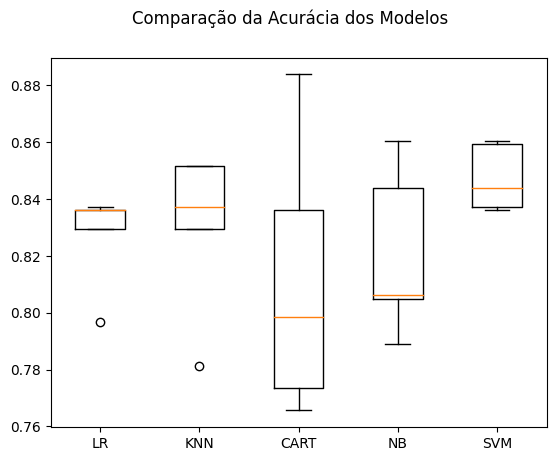

In [167]:
# Lista para armazenas os resultados dos modelos
results = []

# Lista para armazenar os nomes dos modelos percorridos no treinamento
names = []

# Definição da métrica de acurácia
scoring='accuracy'

# Percorre os modelos e treina utilizando validação cruzada, cujo resultado será a métrica de acurácia.
for name, model in models:
  result_cv = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
  results.append(result_cv)
  names.append(name)
  # Imprime na tela a média e desvio padrão do resultado de cada modelo
  print(f'{name} = Média: {result_cv.mean()} | Desvio Padrão: {result_cv.std()}')

# Boxplot para comparação dos modelos
fig = plt.figure()
fig.suptitle('Comparação da Acurácia dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)

# Imprime o boxplot na tela
plt.show()

Observando as saídas acima, os melhores resultados foram obtidos no algorítimo de SVM, com 84,73% de acurácia média e 1% de desvio-padrão.

Dado este percentual, podemos dizer que não houve o <i>underfitting</i> e que os parâmetros foram satisfatórios para a predição.

## Treinamento com comitê de modelos (Ensembles)
Nessa etapa iremos realizar o treinamento utilizando um comitê de modelos com o método <i>Voting</i> com os algorítimos de Regressçao Logística, Árvore de Decisão e SVM. A escolha por esse método dá-se pelo fato dos modelos anteriores terem uma boa concordância entre si (acurácia entre 81% e 84%).

In [168]:
# Criação da lista para armazenar as bases para o VotingClassifier
bases_voting = []

# Definição dos modelos
model_LR = LogisticRegression(max_iter=200)
model_CART = DecisionTreeClassifier()
model_SVM = SVC()

bases_voting.append(('LR',model_LR))
bases_voting.append(('CART',model_CART))
bases_voting.append(('SVM',model_SVM))

# Adicionando as bases de voting à lista de modelos

models.append(('Voting', VotingClassifier(bases_voting)))


Abaixo repetiremos o treino dos algorítimos, desta vez considerando o resultado do *Voting*:

In [169]:
# Percorre os modelos para a validação cruzada e imprime na tela a acurácia
for name, model in models:
  result_cv = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
  results.append(result_cv)
  names.append(name)
  # Imprime na tela a média e desvio padrão do resultado de cada modelo
  print(f'{name} = Média: {result_cv.mean()} | Desvio Padrão: {result_cv.std()}')

LR = Média: 0.8270833333333334 | Desvio Padrão: 0.015346056227954713
KNN = Média: 0.8302083333333334 | Desvio Padrão: 0.025917163394519355
CART = Média: 0.8160852713178294 | Desvio Padrão: 0.04128935763067432
NB = Média: 0.8208333333333332 | Desvio Padrão: 0.026758231210087264
SVM = Média: 0.8473473837209301 | Desvio Padrão: 0.010607975974359078
Voting = Média: 0.8473473837209301 | Desvio Padrão: 0.0079812924562742


Observando a saída acima, percebemos que o resultado do método <i>Voting</i> é idêntico ao do modelo do algorítimo SVM (Ambos 84,734%).

A partir dessa análise, optei por levar adiante os resultados dos algorítimos *SVM* e *Voting* como candidatos ao modelo com melhor acurácia.

## Treinamento com Hiperparâmetro
Para fins de comparação de acurácia, repetiremos o treinamento do algorítimo de KNN, desta vez, utilizando a funcionalidade <i>search grid</i> da biblioteca <i>scikit-learn</i>, onde especificaremos o número de vizinhos e as métricas de distância.

In [170]:
# Atribui o nome do algorítimo
knn_model = KNeighborsClassifier()

# Cria o grid de parâmetros
param_grid = {
    'n_neighbors': [1,5,9,13,17,21],
    'metric': ['euclidian','manhattan','minkowski'],
}

# Executa o grid search com o conjunto de treino com métrica de acurácia
grid_knn = GridSearchCV(estimator=knn_model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_knn.fit(X_train, y_train)

# Imprime na tela o resultado
print(f'Melhor Score: {grid_knn.best_score_} | Utilizando: {grid_knn.best_params_}')

Melhor Score: 0.8473716085271317 | Utilizando: {'metric': 'minkowski', 'n_neighbors': 13}


Observando o resultado acima, é possível notar uma melhora no modelo treinado pelo KNN com os ajustes nos parâmetros (vizinhos = 13 e métrica minkowski), demonstrando uma acurácia de 84,737%.

Esse percentual é ligeiramente maior que a do modelo treinado pelo SVM sem parâmetros configurados (84,734%), logo, esse modelo também será levado adiante como candidato à melhor acurácia.

## Avaliação Com o Conjunto de Teste
Serão criados novos modelos utilizando os algorítimo que obteveram a melhor acurácia anteriormente, sendo eles:
- Voting (ensemble): 84,734%
- SVM: 84,734%
- KNN Tunado (ajuste de hiperparâmetros): 84,737%


Desta vez, treinaremos com todo o conjunto de dados de treino e avaliaremos com o conjunto de teste.

### Voting (ensemble)

In [171]:
# Definindo o modelo de Voting Classifier

model_voting = VotingClassifier(bases_voting)

# Treina com todo o conjunto de dados de treino
model_voting.fit(X_train,y_train)

# Realiza a predição com o conjunto de dados de teste
predictions_voting = model_voting.predict(X_test)

# Estima a acurácia no conjunto de teste e imprime o resultado
print(accuracy_score(y_test, predictions_voting))

0.8586956521739131


Aqui obtivemos o score de 85,86%. Uma melhor acurácia com o conjunto de teste em relação ao conjunto de treino.

### SVM

In [172]:
# Definindo o modelo de SVM
model_svm = SVC()

# Treina com todo o conjunto de dados de treino
model_svm.fit(X_train,y_train)

# Realiza a predição com o conjunto de dados de teste
predictions_svm = model_svm.predict(X_test)

# Estima a acurácia no conjunto de teste e imprime o resultado
print(accuracy_score(y_test, predictions_svm))

0.8659420289855072


Aqui obtivemos o score de 86,59%. Uma melhor acurácia com o conjunto de teste em relação ao conjunto de treino.

### KNN Tunado (hiperparâmetros)

In [173]:
# Realiza a predição com o conjunto de dados de teste
predictions_knn = grid_knn.predict(X_test)

# Estima a acurácia no conjunto de teste
print(accuracy_score(y_test, predictions_knn))

0.855072463768116


Aqui obtivemos o score de 85,50%. Uma melhor acurácia com o conjunto de teste em relação ao conjunto de treino.

### Comparação dos modelos candidatos

A partir dos resultados é possivel estimar que todos os modelos tem uma boa capacidade de generalização, pois apresentaram bons percentuais com com o conjunto de teste. Logo, não houve o <i>Overfitting</i>.

Os resultados com o conjunto de dados teste foram os seguintes:

- Voting (ensemble): 85,86%
- SVM: 86,59%
- KNN Tunado (hiperparâmetros): 85,50%

## Considerações Sobre o Treinamento dos Modelos
Apesar do resultado do KNN Tunado com hiperparâmetros ter sido melhor com os dados de treino, aplicar a predição no conjunto de teste mostrou uma acurácia inferior (85,50%) quando comparado ao modelo SVM treinado com o conjunto de teste (86,59%).

Além disso, dado o percentual dos resultados, ambos os modelos apresentaram boa capacidade de generalização (nenhum <i>overfitting</i> detectado).

### Voting (Treino X Teste)

**84,734%** contra **85,86%** respectivamente.

### SVM (Treino X Teste)
**84,734%** contra **86,59%** respectivamente.

### KNN Tunado (Treino X Teste)
**84,737%** contra **85,50%** respectivamente.

Todos os modelos candidatos apresentaram uma melhor acurácia quando a predição foi realizada no conjunto de dados de teste, mas o modelo **SVM** apresentou uma melhor performance e acurácia neste conjunto em relação aos demais, demonstrando boa capacidade de generalização com dados não vistos, sendo então este o modelo escolhido para a solução do problema proposto neste MVP.